In [1]:
import tensorflow as tf

mnist = tf.keras.datasets.mnist.load_data()
(X_train, y_train), (X_test, y_test) = mnist

X_train, X_test = X_train/255. , X_test/255.

X_train[0].shape

(28, 28)

In [2]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(200, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 200)               40200     
                                                                 
 dense_2 (Dense)             (None, 10)                2010      
                                                                 
Total params: 199210 (778.16 KB)
Trainable params: 199210 (778.16 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Momemtum

In [3]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9)
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = optimizer,
    metrics = ["accuracy"]
)

history = model.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2879 - accuracy: 0.9143 - val_loss: 0.1257 - val_accuracy: 0.9638
Epoch 2/3
1688/1688 [==============================] - 6s 4ms/step - loss: 0.1152 - accuracy: 0.9649 - val_loss: 0.1003 - val_accuracy: 0.9713
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0782 - accuracy: 0.9758 - val_loss: 0.0857 - val_accuracy: 0.9765


### Nesterov Accelerated Gradient

In [4]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=True)
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = optimizer,
    metrics = ["accuracy"]
)

history = model.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 8s 4ms/step - loss: 0.0556 - accuracy: 0.9829 - val_loss: 0.0669 - val_accuracy: 0.9810
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0441 - accuracy: 0.9857 - val_loss: 0.0757 - val_accuracy: 0.9785
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0337 - accuracy: 0.9899 - val_loss: 0.0751 - val_accuracy: 0.9787


### RMSProp

In [5]:
optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01, rho=0.9)
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = optimizer,
    metrics = ["accuracy"]
)

history = model.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.4101 - accuracy: 0.9191 - val_loss: 0.1965 - val_accuracy: 0.9537
Epoch 2/3
1688/1688 [==============================] - 8s 5ms/step - loss: 0.2978 - accuracy: 0.9442 - val_loss: 0.2050 - val_accuracy: 0.9578
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.2913 - accuracy: 0.9499 - val_loss: 0.3115 - val_accuracy: 0.9582


### Adam

In [7]:
optimizer = tf.keras.optimizers.Adam(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = optimizer,
    metrics = ["accuracy"]
)

history = model.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 9s 5ms/step - loss: 0.2442 - accuracy: 0.9486 - val_loss: 0.1396 - val_accuracy: 0.9705
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1605 - accuracy: 0.9621 - val_loss: 0.1476 - val_accuracy: 0.9645
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.1469 - accuracy: 0.9650 - val_loss: 0.1584 - val_accuracy: 0.9678


### AdaMax

In [10]:
optimizer = tf.keras.optimizers.Adamax(learning_rate=0.01, beta_1=0.9, beta_2=0.999)
model.compile(
    loss = tf.keras.losses.sparse_categorical_crossentropy,
    optimizer = optimizer,
    metrics = ["accuracy"]
)

history = model.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 [==============================] - 10s 5ms/step - loss: 0.0634 - accuracy: 0.9839 - val_loss: 0.1149 - val_accuracy: 0.9777
Epoch 2/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0442 - accuracy: 0.9878 - val_loss: 0.1126 - val_accuracy: 0.9797
Epoch 3/3
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0369 - accuracy: 0.9894 - val_loss: 0.1203 - val_accuracy: 0.9805


### Summary

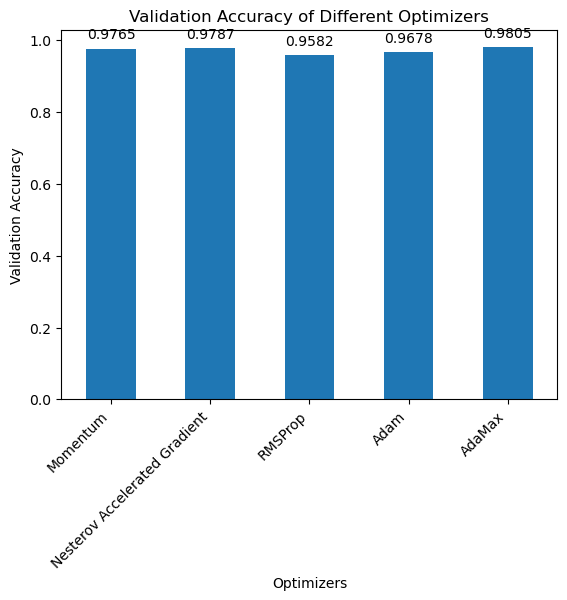

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

summary = {
    'Optimizers': ['Momentum', 'Nesterov Accelerated Gradient', 'RMSProp', 'Adam', 'AdaMax'],
    'val_accuracy': [0.9765, 0.9787, 0.9582, 0.9678, 0.9805]
}

summary = pd.DataFrame(summary)

# Plotting
ax = summary.plot(kind='bar', x='Optimizers', y='val_accuracy', legend=False)
plt.title("Validation Accuracy of Different Optimizers")
plt.ylabel("Validation Accuracy")
plt.xticks(rotation=45, ha='right')
# Adding value labels on top of each bar
for p in ax.patches:
    ax.annotate(str(round(p.get_height(), 4)), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

plt.show()